In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

path = 'outputs/Immobile_terrain_Optomotor_speed_3_stats.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)

In [3]:
def mean_std(neuron):
    std_over_time_eye1 = np.std(data[neuron]['all'][:, 0, :], axis=1)
    std_over_time_eye2 = np.std(data[neuron]['all'][:, 1, :], axis=1)
    std_over_time_mean = (std_over_time_eye1 + std_over_time_eye2) / 2
    return std_over_time_mean

In [ ]:
neurons = ['T4a', 'T4b', 'T5a', 'T5b', 'Tm1', 'Tm2', 'Tm3', 'Tm4', 'Tm9']
col = ['r', 'r', 'b', 'b', 'y', 'g', 'magenta', 'grey', 'k']
line = ['-', '-.', '-', '-.', ':', ':', ':', ':', ':']
time_points = np.arange(data[neurons[0]]['all'].shape[0])

The following cell is used to generate figures representing the standard deviation of neural activities using data from a simulation using neural acitivities from all the relevant T4, T5 and Tm neurons.

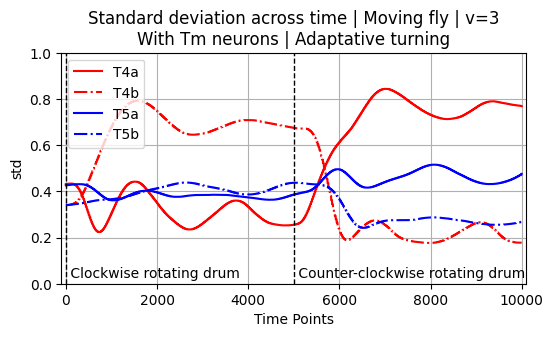

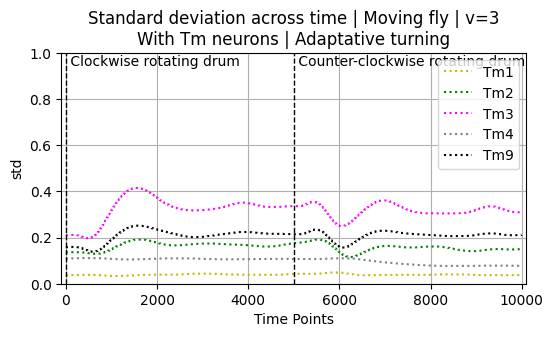

In [4]:
plt.figure(figsize=(6, 3))
for i in range(0, 4):
    std_over_time_mean = mean_std(neurons[i])
    plt.plot(time_points, std_over_time_mean, color = col[i], linestyle = line[i], label=neurons[i])
plt.title('Standard deviation across time | Moving fly | v=3\nWith Tm neurons | Adaptative turning')
plt.xlabel('Time Points')
plt.ylabel('std')

plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.text(0, 0.025, ' Clockwise rotating drum', color='k', ha='left')

plt.axvline(x=5000, color='k', linestyle='--', linewidth=1)
plt.text(5000, 0.025, ' Counter-clockwise rotating drum', color='k', ha='left')

plt.legend()
plt.grid(True)
plt.ylim([0,1])
plt.xlim([-100, 10100])
plt.show()

plt.figure(figsize=(6, 3))
for i in range(4, 9):
    time_points = np.arange(data[neurons[i]]['all'].shape[0])
    std_over_time_mean = mean_std(neurons[i])
    plt.plot(time_points, std_over_time_mean, color = col[i], linestyle = line[i], label=neurons[i])
plt.title('Standard deviation across time | Moving fly | v=3\nWith Tm neurons | Adaptative turning')
plt.xlabel('Time Points')
plt.ylabel('std')

plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.text(0, 0.945, ' Clockwise rotating drum', color='k', ha='left')

plt.axvline(x=5000, color='k', linestyle='--', linewidth=1)
plt.text(5000, 0.945, ' Counter-clockwise rotating drum', color='k', ha='left')

plt.legend()
plt.grid(True)
plt.ylim([0,1])
plt.xlim([-100, 10100])
plt.show()

The following cell is used to generate figues representing the turning strength using data from a simulation using neural acitiviies from all the relevant T4, T5 and Tm neurons.

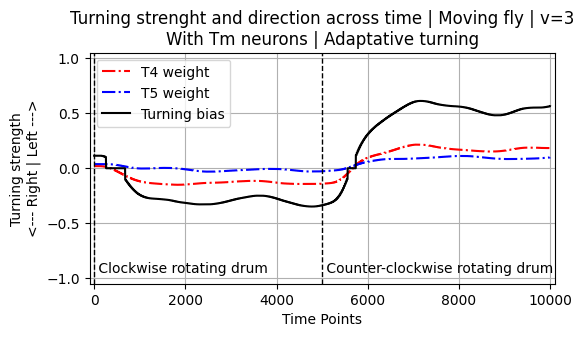

In [5]:
T4a_std = mean_std('T4a')
T4b_std = mean_std('T4b')
T5a_std = mean_std('T5a')
T5b_std = mean_std('T5b')

Tm1_std = mean_std('Tm1')
Tm2_std = mean_std('Tm2')
Tm3_std = mean_std('Tm3')
Tm4_std = mean_std('Tm4')
Tm9_std = mean_std('Tm9')

T4_std = (T4a_std - T4b_std) * (Tm3_std)
T5_std = (T5a_std - T5b_std) * (Tm1_std + Tm2_std + Tm4_std + Tm9_std)

T_std = (T4_std + T5_std) * 2
T_std[np.abs(T_std) < 0.05*2] = 0

# Uncomment this line for all-or-none (simple) type controller
#T_std = np.sign(T_std)

time_points = np.arange(T4_std.shape[0])

plt.figure(figsize=(6, 3))
plt.plot(time_points, T4_std, 'r-.', label='T4 weight')
plt.plot(time_points, T5_std, 'b-.', label='T5 weight')
plt.plot(time_points, T_std, 'k', label='Turning bias')

plt.title('Turning strenght and direction across time | Moving fly | v=3\nWith Tm neurons | Adaptative turning')
plt.xlabel('Time Points')
plt.ylabel('Turning strength\n<--- Right | Left --->')

plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.text(0, -0.95, ' Clockwise rotating drum', color='k', ha='left')

plt.axvline(x=5000, color='k', linestyle='--', linewidth=1)
plt.text(5000, -0.95, ' Counter-clockwise rotating drum', color='k', ha='left')

plt.legend()
plt.grid(True)
plt.xlim([-100, 10100])
plt.ylim([-1.05, 1.05])
plt.show()

The following cell is used to generate figues representing the turning strength using data from a simulation using neural acitiviies from only the T4 and T5 neurons.

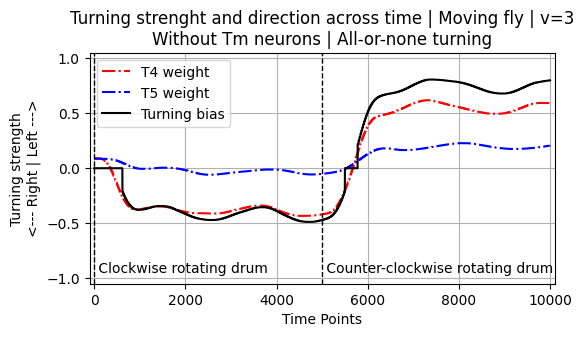

In [6]:
T4a_std = mean_std('T4a')
T4b_std = mean_std('T4b')
T5a_std = mean_std('T5a')
T5b_std = mean_std('T5b')

T4_std = (T4a_std - T4b_std)
T5_std = (T5a_std - T5b_std)

T_std = (T4_std + T5_std)
T_std[np.abs(T_std) < 0.05*4] = 0

# Uncomment this line for all-or-none (simple) type controller
#T_std = np.sign(T_std)

time_points = np.arange(T4_std.shape[0])

plt.figure(figsize=(6, 3))
# Plotting the mean of the standard deviation
plt.plot(time_points, T4_std, 'r-.', label='T4 weight')

plt.plot(time_points, T5_std, 'b-.', label='T5 weight')

plt.plot(time_points, T_std, 'k', label='Turning bias')
plt.title('Turning strenght and direction across time | Moving fly | v=3\nWithout Tm neurons | All-or-none turning')
plt.xlabel('Time Points')
plt.ylabel('Turning strength\n<--- Right | Left --->')

plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.text(0, -0.95, ' Clockwise rotating drum', color='k', ha='left')

plt.axvline(x=5000, color='k', linestyle='--', linewidth=1)
plt.text(5000, -0.95, ' Counter-clockwise rotating drum', color='k', ha='left')

plt.legend()
plt.grid(True)
plt.xlim([-100, 10100])
plt.ylim([-1.05, 1.05])
plt.show()

The following cell is used to generate figues representing the difference of standard deviations of neural activities from different neurons during a looming cisual stimulus. It is generated using data from a simulation using neural acitiviies from only the T4 and T5 neurons.

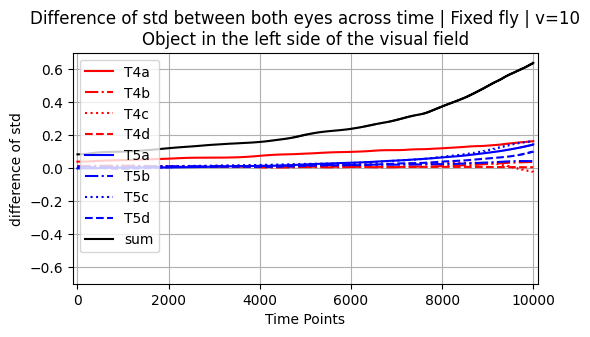

In [11]:
path = 'outputs/Immobile_terrain_Looming_speed_10_stats.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)

def mean_std_eye(neuron):
    std_over_time_eye1 = np.std(data[neuron]['all'][:, 0, :], axis=1)
    std_over_time_eye2 = np.std(data[neuron]['all'][:, 1, :], axis=1)
    std_dif = std_over_time_eye1 - std_over_time_eye2

    return std_dif

neurons = ['T4a', 'T4b', 'T4c', 'T4d', 'T5a', 'T5b', 'T5c', 'T5d']
col = ['r', 'r', 'r', 'r', 'b', 'b', 'b', 'b']
line = ['solid', 'dashdot', 'dotted', 'dashed', 'solid', 'dashdot', 'dotted', 'dashed']
plt.figure(figsize=(6, 3))
a = []
for i in range(0, 8):
    time_points = np.arange(data[neurons[i]]['all'].shape[0])
    std_over_time_mean = mean_std_eye(neurons[i])
    a.append(std_over_time_mean)
    plt.plot(time_points, std_over_time_mean, color = col[i], linestyle = line[i], label=neurons[i])
a = np.sum(a, axis=0)
plt.plot(time_points, a, c = 'k', label = 'sum')
plt.title('Difference of std between both eyes across time | Fixed fly | v=10\nObject in the left side of the visual field')
plt.xlabel('Time Points')
plt.ylabel('difference of std')

plt.legend(loc='upper left')
plt.grid(True)
plt.ylim([-0.7,0.7])
plt.xlim([-100, 10100])
plt.show()

